In [1]:
import numpy as np
import pandas as pd

In [2]:
ds=pd.read_csv('diabetes.csv')

In [3]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


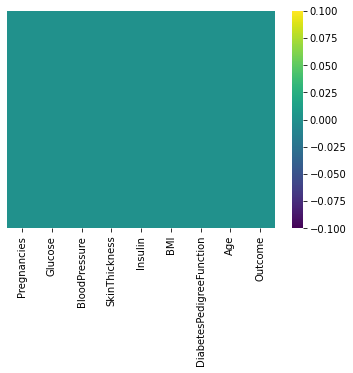

In [7]:
#Heatmap showing the null values
sns.heatmap(ds.isnull(),yticklabels=False,cmap='viridis')

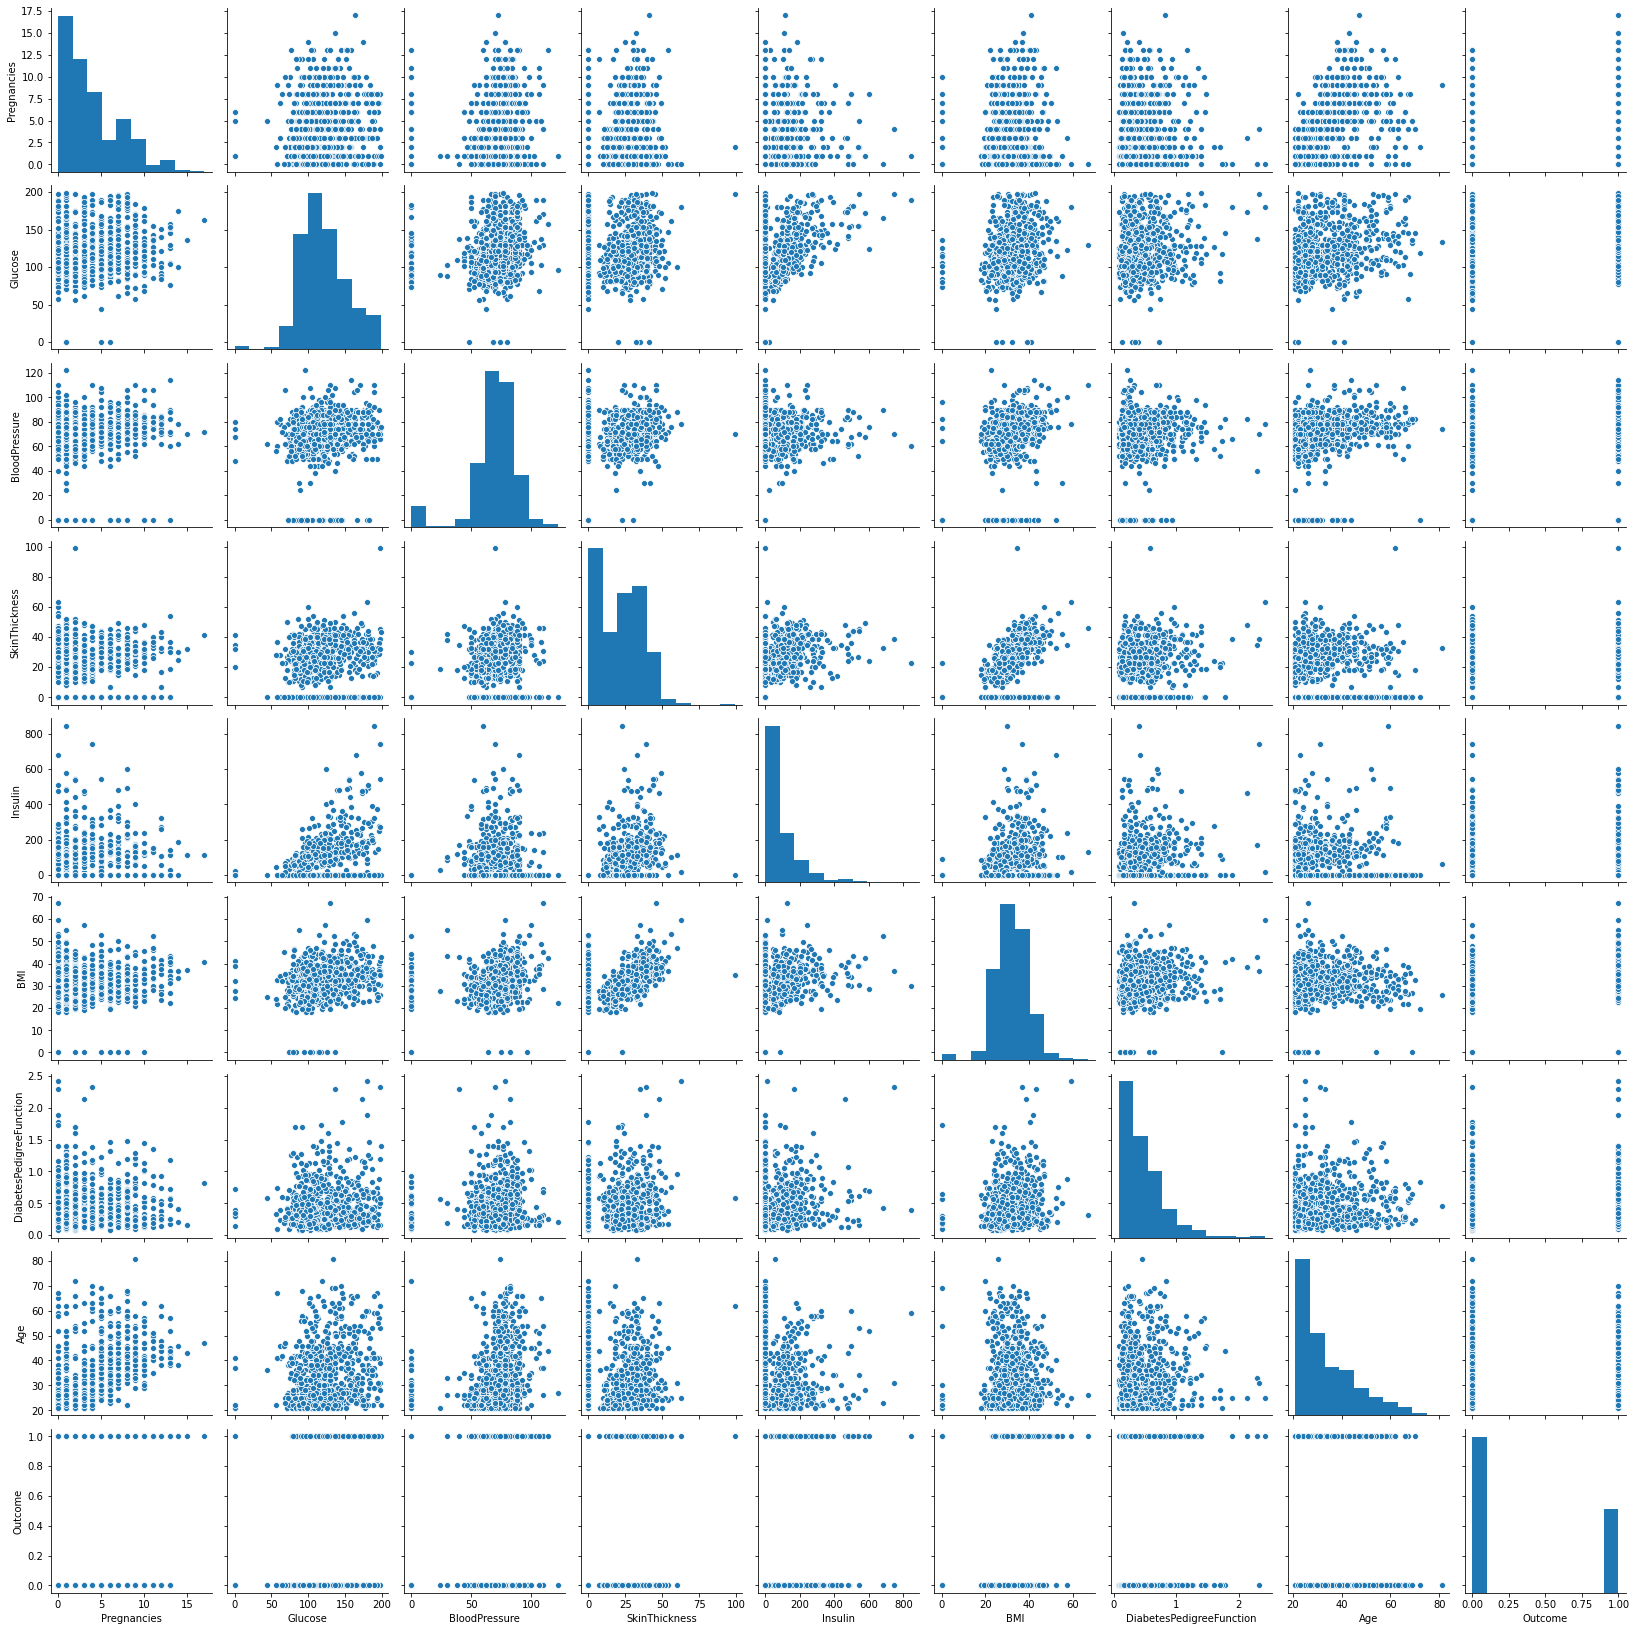

In [8]:
sns.pairplot(ds)

### If we observe the pair plots above, the vertical and horizontal patterns in the edges are due to the 0's in the columns which are similar to null values which is replaced with respective mean/mode values based on the columns in upcoming cells.

### The results of the plots indicate that there are no/very less outliers  so the data distribution is quite good leading no work to remove the outliers

### Note: The outlier analysis mentioned above is simple analysis and we can use separate methods for the indepth analysis for the outliers

## Correlation


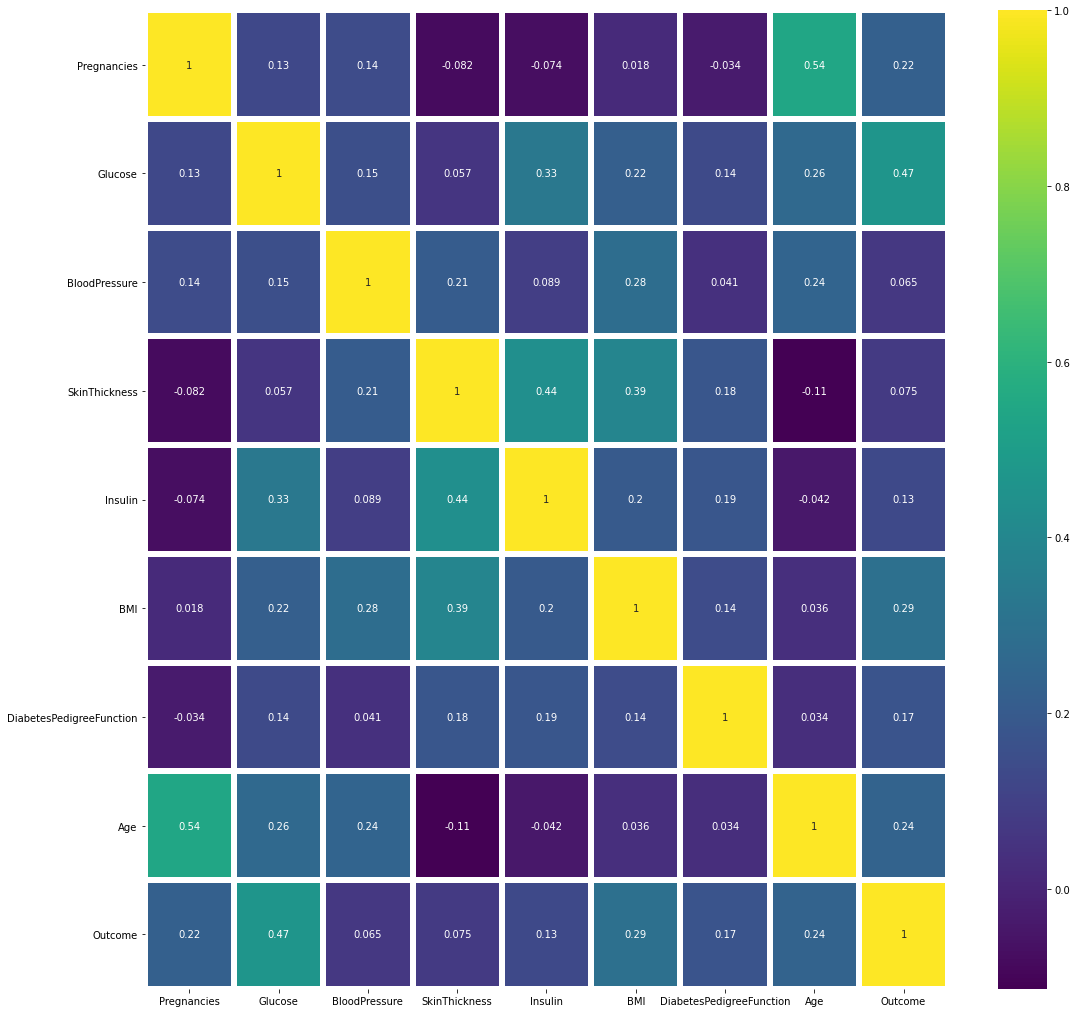

In [9]:
p,ax=plt.subplots(figsize=(18,18))
sns.heatmap(ds.corr(),annot=True,linewidths=5,ax=ax,cmap='viridis')

### One observation from the output of the correlation matrix says us almost all the features are not highly dependent on the others.So we can conclude that there is very little correlation between the features


# Check the data distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


[]

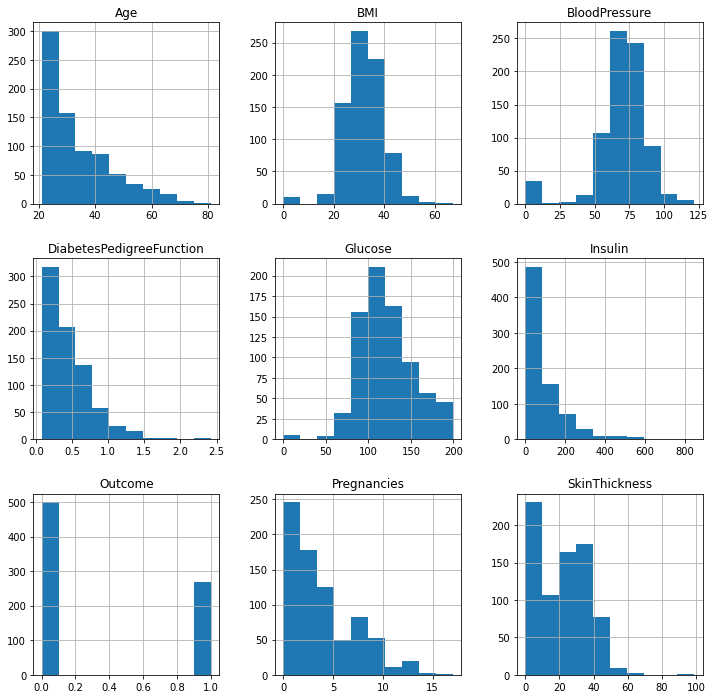

In [10]:
f=plt.figure(figsize=(12,12))
ax=f.gca()
ds.hist(ax=ax)
plt.plot()

### Some of the features are evenly distributed and some of the featurs like skin thinkness ,pregnencies etc are not.
### These are to be normalized and make them centered/ evenly distributed by making the values to mean of 0

In [11]:
ds.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [12]:
ds1=ds.replace(0,np.nan)
ds1.Outcome=ds.Outcome
ds1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [13]:
k=ds1.Pregnancies.fillna(int(0))
ds1.Pregnancies=k
ds1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [14]:
ds1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
p=ds1.Glucose.fillna(int(ds1.Glucose.mean()))
ds1.Glucose=p
p=ds1.BloodPressure.fillna(int(ds1.BloodPressure.mean()))
ds1.BloodPressure=p
p=ds1.SkinThickness.fillna(int(ds1.SkinThickness.mean()))
ds1.SkinThickness=p
p=ds1.Insulin.fillna(int(ds1.Insulin.mean()))
ds1.Insulin=p
p=ds1.BMI.fillna(ds1.BMI.mean())
ds1.BMI=p
ds1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [16]:
ds1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### we can see that there are no null values present


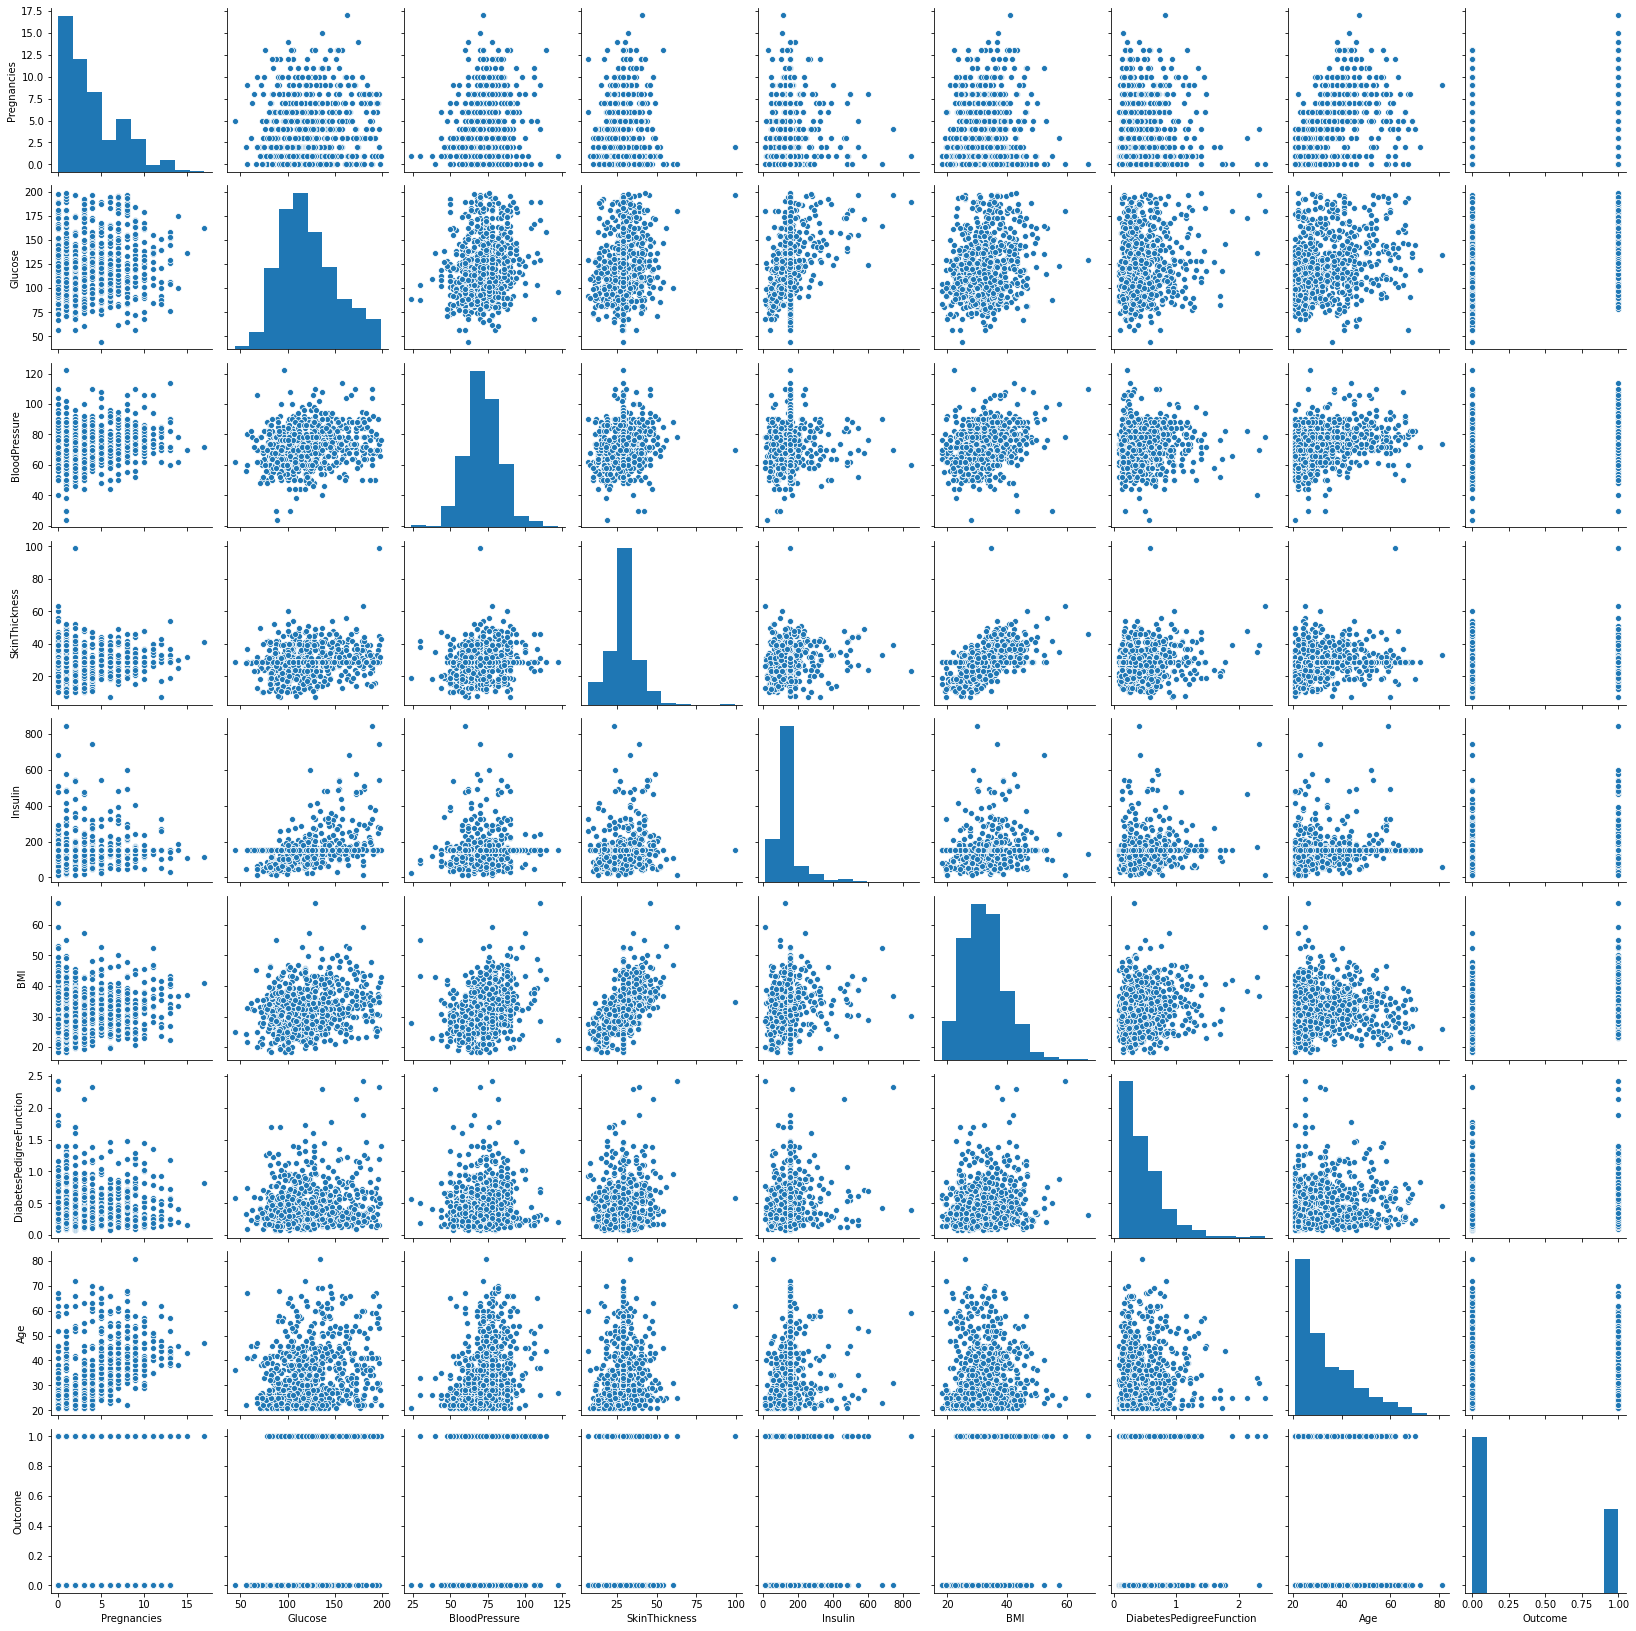

In [19]:
sns.pairplot(ds1)

### As we normalized the distribution and filled the 0's with mean we have removed the horizontal and vertical borders in the plots and we have very little data and very less no of outliers by initial observation so we can now directly apply machine learning algorithm

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Train and Test split

In [23]:
X = ds1.iloc[:,0:8]

y = ds1.iloc[:,8]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')

In [40]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [41]:

y_pred = classifier.predict(X_test)

In [42]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[98  9]
 [21 26]]
0.6341463414634146


In [43]:
print(accuracy_score(y_test,y_pred))

0.8051948051948052


In [88]:
from sklearn import metrics

## KNN approach with different values of K from 0 to 15 

In [89]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75324675, 0.74675325, 0.78571429, 0.7987013 , 0.75324675,
       0.78571429, 0.79220779, 0.81168831, 0.7987013 , 0.80519481,
       0.81818182, 0.7987013 , 0.81818182, 0.7987013 ])

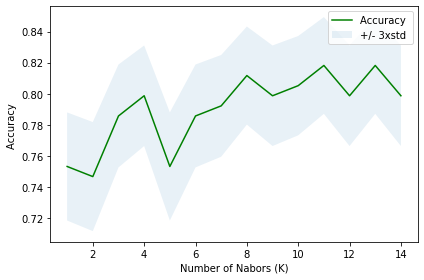

In [90]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [91]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8181818181818182 with k= 11


## The graph shows the accuracy with different K values such that k=11 gives more accuracy than other k values

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [94]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.17209682, 0.82790318],
       [0.70145231, 0.29854769],
       [0.77235416, 0.22764584],
       [0.41403398, 0.58596602],
       [0.73207022, 0.26792978],
       [0.85894835, 0.14105165],
       [0.33855337, 0.66144663],
       [0.25854567, 0.74145433],
       [0.53722284, 0.46277716],
       [0.52781444, 0.47218556],
       [0.40437961, 0.59562039],
       [0.15056613, 0.84943387],
       [0.58323022, 0.41676978],
       [0.72736145, 0.27263855],
       [0.73740183, 0.26259817],
       [0.72118515, 0.27881485],
       [0.26920709, 0.73079291],
       [0.89487769, 0.10512231],
       [0.49652335, 0.50347665],
       [0.68283305, 0.31716695],
       [0.40976319, 0.59023681],
       [0.53784041, 0.46215959],
       [0.76973648, 0.23026352],
       [0.78132379, 0.21867621],
       [0.82727268, 0.17272732],
       [0.61435394, 0.38564606],
       [0.80819379, 0.19180621],
       [0.2080388 , 0.7919612 ],
       [0.76495951, 0.23504049],
       [0.71194335, 0.28805665],
       [0.

In [95]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7792207792207793

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



## By comparing KNN and Logistic Regression we can say that KNN works best for this dataset providing 81% accuracy for the test Data



---

END- The below code represents the additional neural network approach need to be tuned as it is proned to over fitting when tried with large number of nodes



---



In [44]:
import keras

In [75]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [52]:
n_cols = X.shape[1] # number of predictors

In [82]:
# define classifier model
def classifier_model():
    # create model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    # compile model
    model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=[tf.keras.metrics.Accuracy()])
    return model

In [83]:
# build the model
model = classifier_model()

In [86]:
# fit the model
model.fit(X, y, validation_split=0.2, epochs=500, verbose=2)

Epoch 1/500
20/20 - 0s - loss: 0.4103 - accuracy: 0.0000e+00 - val_loss: 0.5819 - val_accuracy: 0.0000e+00
Epoch 2/500
20/20 - 0s - loss: 0.4895 - accuracy: 0.0000e+00 - val_loss: 0.6138 - val_accuracy: 0.0000e+00
Epoch 3/500
20/20 - 0s - loss: 0.4480 - accuracy: 0.0000e+00 - val_loss: 0.7701 - val_accuracy: 0.0000e+00
Epoch 4/500
20/20 - 0s - loss: 0.4222 - accuracy: 0.0000e+00 - val_loss: 0.7059 - val_accuracy: 0.0000e+00
Epoch 5/500
20/20 - 0s - loss: 0.5045 - accuracy: 0.0000e+00 - val_loss: 0.6372 - val_accuracy: 0.0000e+00
Epoch 6/500
20/20 - 0s - loss: 0.4355 - accuracy: 0.0000e+00 - val_loss: 0.5952 - val_accuracy: 0.0000e+00
Epoch 7/500
20/20 - 0s - loss: 0.4344 - accuracy: 0.0000e+00 - val_loss: 0.6918 - val_accuracy: 0.0000e+00
Epoch 8/500
20/20 - 0s - loss: 0.4234 - accuracy: 0.0000e+00 - val_loss: 0.6298 - val_accuracy: 0.0000e+00
Epoch 9/500
20/20 - 0s - loss: 0.4281 - accuracy: 0.0000e+00 - val_loss: 0.7332 - val_accuracy: 0.0000e+00
Epoch 10/500
20/20 - 0s - loss: 0.440